In [1]:
import numpy as np
import pandas as pd
import pandas_profiling
import matplotlib.pyplot as plt
import seaborn as sns
from ggplot import *
%matplotlib inline
plt.style.use('ggplot')

In [2]:
data = pd.read_csv('../data/cpj.csv')
data.head(2)

,Type,Date,Name,Sex,Country_killed,Organization,Nationality,Medium,Job,Coverage,Freelance,Local_Foreign,Source_fire,Type_death,Impunity_for_murder,Taken_captive,Threatened,Tortured
0,Motive Confirmed,"October 22, 2016",Ali Risan,Male,Iraq,Al-Sumaria TV,Iraqi,"Television, Internet",Camera Operator,War,No,Local,Political Group,Crossfire/Combat-Related,NaN,NaN,NaN,\n
1,Motive Confirmed,"October 21, 2016",Ahmet Haceroğlu,Male,Iraq,Türkmeneli TV,Iraqi,Television,Producer,"Politics, War",No,Local,Political Group,Crossfire/Combat-Related,NaN,NaN,NaN,\n


In [3]:
print('Data shape: {}'.format(data.shape))
data.columns

Data shape: (1782, 18)


Index([u'Type', u'Date', u'Name', u'Sex', u'Country_killed', u'Organization',
       u'Nationality', u'Medium', u'Job', u'Coverage', u'Freelance',
       u'Local_Foreign', u'Source_fire', u'Type_death', u'Impunity_for_murder',
       u'Taken_captive', u'Threatened', u'Tortured'],
      dtype='object')

## Data cleaning and preparing

In [ ]:
# Clearing date format
# If Date is unknown, set to latest possible.
data[data['Date'] == 'October 2015 - June 2016'] = 'June 01, 2016'
data[data['Date'] == 'January 30 to February 24, 2016'] = 'February 24, 2016'
data[data['Date'] == 'August 2015'] = 'August 01, 2015'
data[data['Date'] == 'May 22 or 23, 2015'] = 'May 24, 2015'
data[data['Date'] == 'May 13, 14, 15, 16, 17, or 18, 2015'] = 'May 18, 2015'
data[data['Date'] == 'May 2,3 or 4, 2015'] = 'May 04, 2015'
data[data['Date'] == 'Unknown'] = 'June 01, 1990'
data[data['Date'] == 'January 2015'] = 'January 01, 2015'
data[data['Date'] == 'August or September, 2014'] = 'September 01, 2014'
data[data['Date'] == 'August 2014'] = 'August 01, 2014'
data[data['Date'] == 'May 2014'] = 'May 01, 2014'
data[data['Date'] == 'Between February 5 and 11, 2014'] = 'February 11, 2014'
data[data['Date'] == 'November 19 or 20, 2011'] = 'November 20, 2011'
data[data['Date'] == 'November 2011'] = 'November 01, 2011'
data[data['Date'] == 'May 29 or 30, 2011'] = 'May 30, 2011'
data[data['Date'] == 'March 2011'] = 'March 01, 2011'
data[data['Date'] == 'May 9 or 10, 2010'] = 'May 10, 2010'
data[data['Date'] == 'May 18 or 19, 2009'] = 'May 19, 2009'

In [4]:
data['Date'] = pd.to_datetime(data['Date'], format='%B %d, %Y', errors='coerce')
data = data[data['Date'].notnull()]
data['Year'] = data['Date'].map(lambda it: it.year)

## Plots

In [149]:
def count_plot(data, x):
    sns.set(font_scale=1.2)
    sns.set(style='darkgrid')
    g = sns.factorplot(x=x, data=data, kind='count', size=8, aspect=1.5,
              palette='BuPu')
    return g

def top_count_plot(data, col_name):
    sns.set(font_scale=1.3)
    plt.rcParams['figure.figsize'] = (16,9)
    killed_by_col_name = data[col_name].value_counts()[:10]
    pd.DataFrame(killed_by_col_name, index=None)
    sns.barplot(killed_by_col_name.index, killed_by_col_name.values, palette='BuPu')
    
def plot_by_groups(data, cols_to_group, cols_to_plot, style=None):
    t = data[cols_to_group].groupby(cols_to_group).size()
    t = t.unstack().fillna(0).stack()
    if not style:
        style = {}
    for col in cols_to_plot:
        plt.plot(t[col], **style)
    plt.legend()

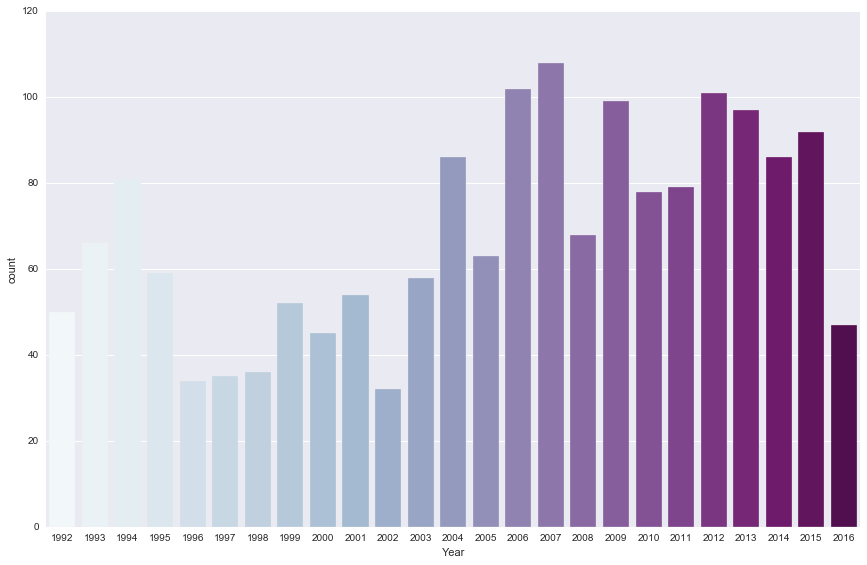

In [150]:
count_plot(data, 'Year')
plt.show()

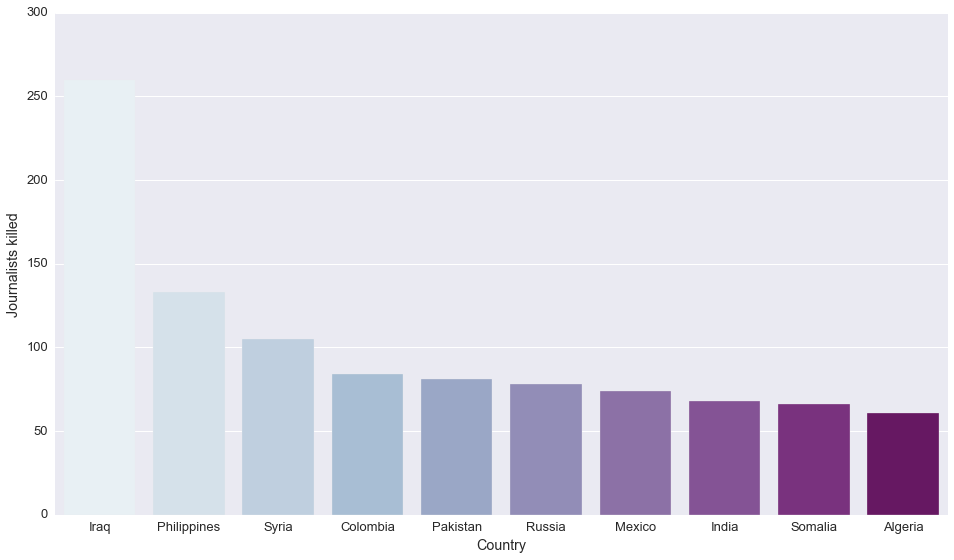

In [152]:
top_count_plot(data, 'Country_killed')
plt.xlabel('Country')
plt.ylabel('Journalists killed')
plt.show()

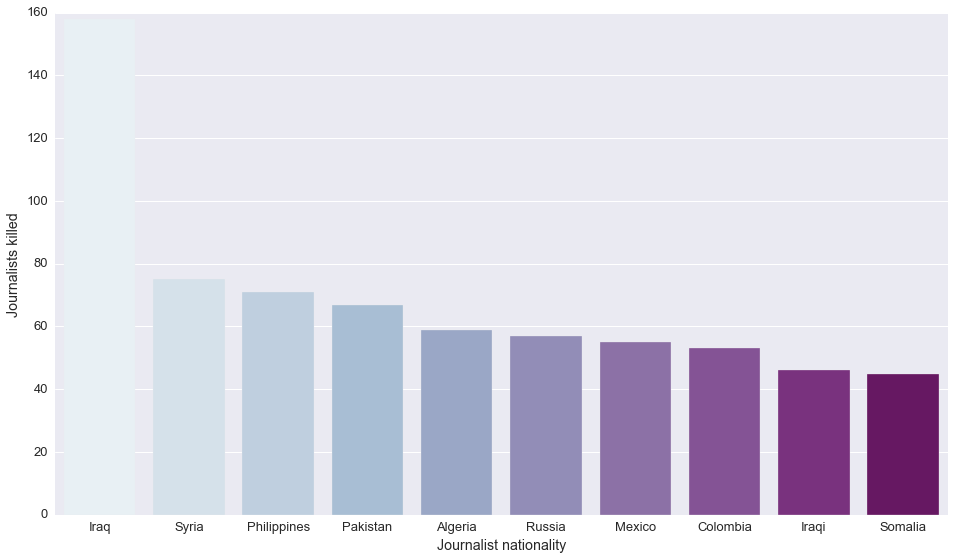

In [153]:
top_count_plot(data, 'Nationality')
plt.xlabel('Journalist nationality')
plt.ylabel('Journalists killed')
plt.show()

### Country killes by year

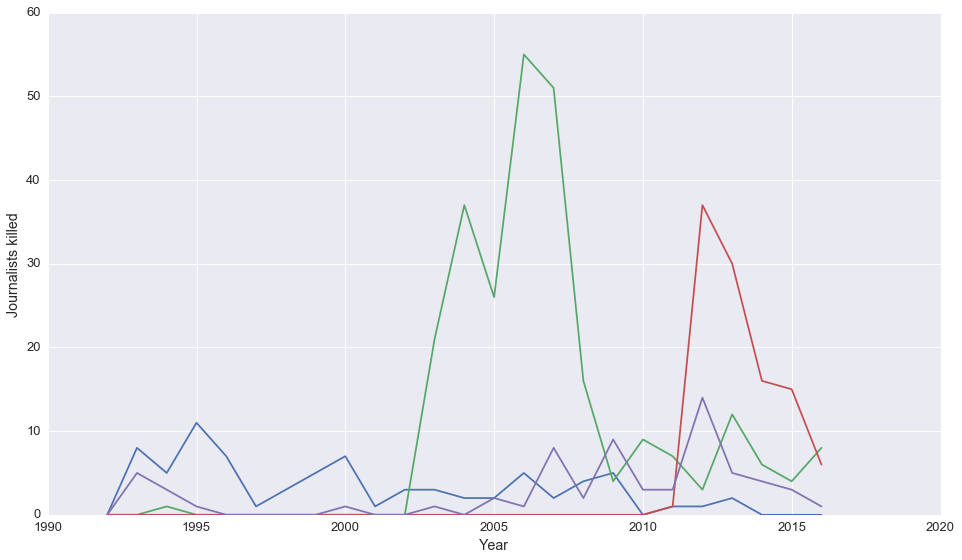

In [148]:
plot_by_groups(data, ['Country_killed', 'Year'], ['Russia', 'Iraq', 'Syria', 'Somalia'])
plt.xlabel('Year')
plt.ylabel('Journalists killed')
plt.show()

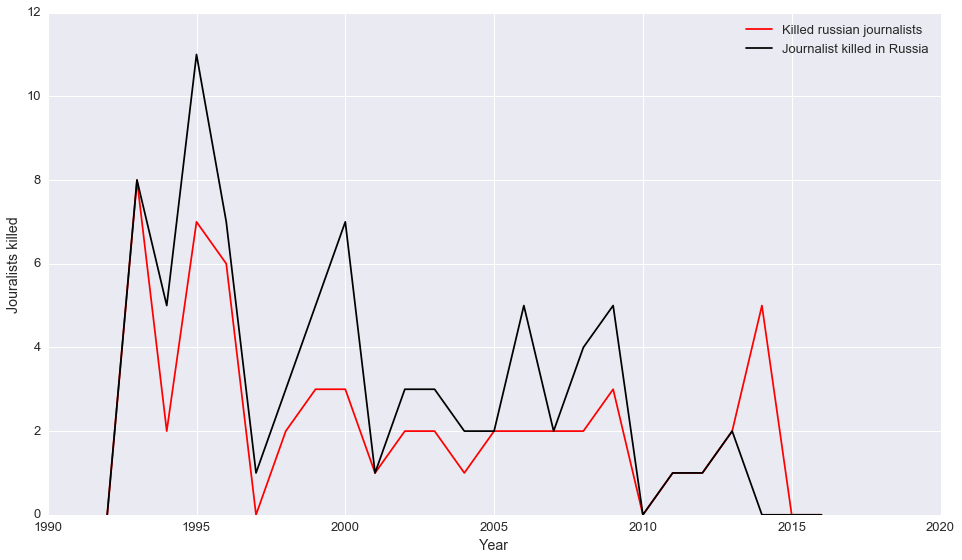

In [154]:
plot_by_groups(data, ['Nationality', 'Year'], ['Russia'], style={'c': 'red', 'label':'Killed russian journalists'})
plot_by_groups(data, ['Country_killed', 'Year'], ['Russia'], style={'c': 'black', 'label':'Journalist killed in Russia'})
plt.xlabel('Year')
plt.ylabel('Jouralists killed')

plt.show()